# Quantum Circuits
Quantum computers can only use a specific set of gates (universal gate set). Given the entanglers and their amplitudes found in Step 3, one can find corresponding representation of these operators in terms of elementary gates using the following procedure.

In [1]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import time
import matplotlib.pyplot as plt
from utility import obtain_PES

basis = 'sto-3g'

/home/ushnish/.local/lib/python3.7/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


In [2]:
bond_lengths = np.linspace(0.2, 2.6, 15)
# bond_lengths = np.linspace(0.2, 2.6, 16)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.088228184406917 Eh
E = -1.1369289594005694 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154681711140934 Eh
E = -0.9873930555210578 Eh
E = -0.9670259116093078 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283363 Eh
E = -0.9351960308386074 Eh


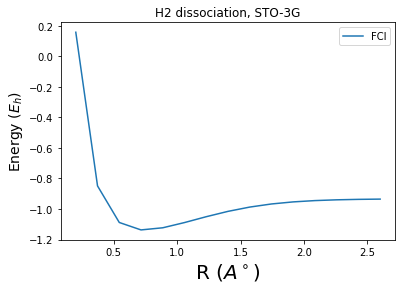

In [4]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')

plt.legend()

In [5]:


# symbols = ["H", "H"]
# coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.323])

# H, qubits = qchem.molecular_hamiltonian(symbols, coordinates) # Lots of defaults; maybe mention
# print(f"Number of qubits = {qubits}\n")
# print(f"H = {H}")

In [6]:
def initialize_state():
    # print(hf)
    qml.BasisState(hf, wires=[0, 1, 2, 3])

def variational_circuit(theta):
    qml.DoubleExcitation(theta, wires=[0, 1, 2, 3])

def vqe_circuit(theta, wires):
    initialize_state()
    variational_circuit(theta)

In [11]:

dev = qml.device('default.qubit', wires=4)
symbols = ["H", "H"]
electrons = 2
geometry = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
vqe_PES = list()

for bond_length in bond_lengths:
    geometry[-1] = bond_length
    coordinates = np.array(geometry)
    print('\n', bond_length, coordinates)
    H, qubits = qchem.molecular_hamiltonian(symbols, coordinates) # Lots of defaults; maybe mention
    # wires = list(range(qubits))
    hf = qml.qchem.hf_state(electrons, qubits)
    
    cost = qml.ExpvalCost(vqe_circuit, H, dev)

    opt = qml.GradientDescentOptimizer(stepsize=0.4)

    theta = np.array(0.0)

    energy_record = [cost(theta)] 
    theta_record = [theta]

    # break
    
    for n in range(20):
        t1 = time.time()
        theta, prev_energy = opt.step_and_cost(cost, theta)
        t2 = time.time()
        energy = cost(theta)
        
        energy_record.append(energy)
        theta_record.append(theta)
        
        # print(f"n = {n},  E = {energy:.8f} H, t = {(t2-t1):.3f} S")
        
        if np.abs(energy - prev_energy) <= 1e-6:
            break

    print(f"Initial E = {energy_record[0]:.8f} Final E = {energy_record[-1]:.8f}")
    print(f"Initial theta = {theta_record[0]:.8f} Final theta = {theta_record[-1]:.8f}")
    vqe_PES.append(energy_record[-1])
    # break



 0.2 [0.  0.  0.  0.  0.  0.2]
Initial E = 2.42825912 Final E = 2.42230189
Initial theta = 0.00000000 Final theta = 0.07613967

 0.37142857142857144 [0.         0.         0.         0.         0.         0.37142857]
Initial E = 0.20668600 Final E = 0.20002812
Initial theta = 0.00000000 Final theta = 0.08420238

 0.5428571428571429 [0.         0.         0.         0.         0.         0.54285714]
Initial E = -0.53215207 Final E = -0.53993565
Initial theta = 0.00000000 Final theta = 0.09683008

 0.7142857142857142 [0.         0.         0.         0.         0.         0.71428571]
Initial E = -0.85585335 Final E = -0.86519585
Initial theta = 0.00000000 Final theta = 0.11377521

 0.8857142857142857 [0.         0.         0.         0.         0.         0.88571429]
Initial E = -1.01098234 Final E = -1.02233864
Initial theta = 0.00000000 Final theta = 0.13487009

 1.0571428571428572 [0.         0.         0.         0.         0.         1.05714286]
Initial E = -1.08414406 Final E = -1

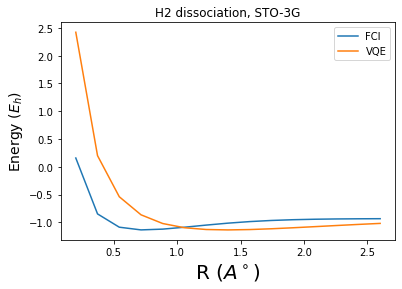

In [12]:
plt.title('H2 dissociation, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.plot(bond_lengths, vqe_PES, label='VQE')

plt.legend()

In [9]:
FCI_PES

array([ 0.15748213, -0.84889911, -1.08822818, -1.13692896, -1.12295705,
       -1.08876454, -1.05044204, -1.01546817, -0.98739306, -0.96702591,
       -0.95342424, -0.94490899, -0.93981979, -0.9368706 , -0.93519603])

In [26]:
vqe_PES

[2.422301892370016,
 0.20002812261582759,
 -0.5399356482900576,
 -0.8651958519605847,
 -1.022338640436373,
 -1.0980075996832,
 -1.1299293875162784,
 -1.1372751372298535,
 -1.1307666252330628,
 -1.1165961674337894,
 -1.0983868069185334,
 -1.0783523970296849,
 -1.0579608378145704,
 -1.0382431608803926,
 -1.019916790031067]